1. Use t-sne to visualize the data, and show the scatter plots of first two principal components,
and of two arbitrarily selected features.

In [32]:
#load and preprocess data
import pandas as pd
from sklearn.preprocessing import StandardScaler

columns = ["Area", "Perimeter", "Compactness", "Length", "Width", "Asymmetry", "lenGroove", "Class"]
data = pd.read_csv("seeds_dataset.txt", sep='\t', names=columns)
data.dropna()

X = data.drop("Class", axis=1).to_numpy()
y = data["Class"]

#use standardized scaler to prevent massive disparities in values
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)


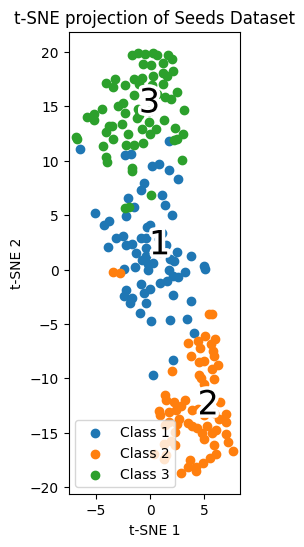

In [33]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import numpy as np


tsne = TSNE(n_components=2,
            init='pca',
            random_state=123)

X_tsne = tsne.fit_transform(X_scaled)

#visualize the TSNE

def plot_projection(x, colors):
    f = plt.figure(figsize=(8, 6))
    ax = plt.subplot(aspect='equal')
    
    # Adjust for class labels 1, 2, 3
    for i in range(1, 4):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1],
                    label=f"Class {i}")
        
    for i in range(1, 4):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
    
    plt.legend()
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("t-SNE projection of Seeds Dataset")


plot_projection(X_tsne, y)
plt.show()



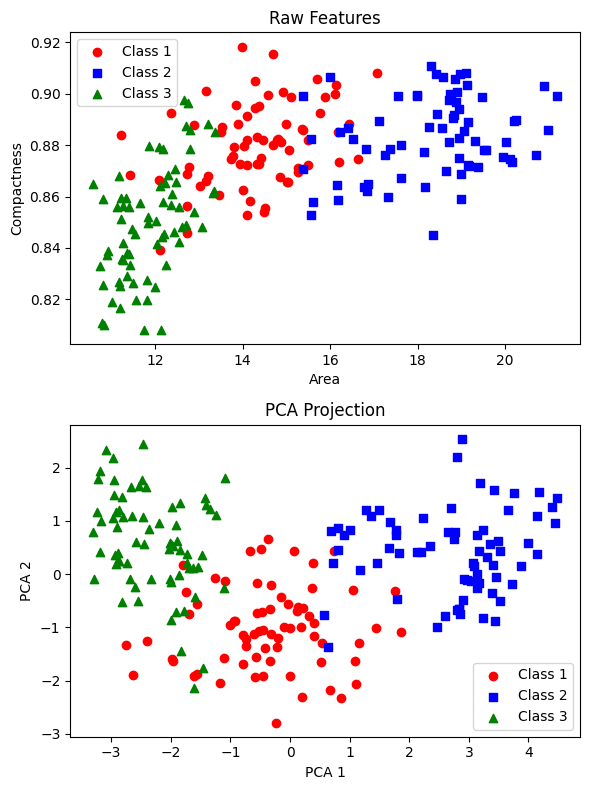

In [34]:
# Now, to show scatterplots of first two PCS and two features

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
fig, axs = plt.subplots(2, 1, figsize=(6, 8))


for l, c, m in zip(np.unique(y), colors, markers):
    axs[0].scatter(X[y == l, 0], X[y == l, 2],  # Area vs Compactness
                   c=c, label=f'Class {l}', marker=m)
axs[0].set(xlabel='Area', ylabel='Compactness')
axs[0].legend()
axs[0].set_title("Raw Features")

for l, c, m in zip(np.unique(y), colors, markers):
    axs[1].scatter(X_pca[y == l, 0], X_pca[y == l, 1],
                   c=c, label=f'Class {l}', marker=m)
axs[1].set(xlabel='PCA 1', ylabel='PCA 2')
axs[1].legend()
axs[1].set_title("PCA Projection")

plt.tight_layout()
plt.show()



2. Cluster the data using K-means, hierarchical clustering, and DBSCAN, and evaluate the performance of each clustering algorithm with adjusted rand index using the adjusted rand score
module in sklearn.

In [35]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_rand_score

#perform kmeans
km = KMeans(n_clusters=3, n_init=10, random_state=42) #picked clusters=3 with elbow method
y_kmeans = km.fit_predict(X_scaled)

#perform hierachial clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage="ward")
y_agglo = agglo.fit_predict(X_scaled)

#perform DBSCAN
dbscan = DBSCAN(eps=0.85, min_samples=4) 
y_dbscan = dbscan.fit_predict(X_scaled)

print("Adjusted Rand Index scores:")
print(f"K-Means:        {adjusted_rand_score(y, y_kmeans):.3f}")
print(f"Agglomerative:  {adjusted_rand_score(y, y_agglo):.3f}")
print(f"DBSCAN:         {adjusted_rand_score(y, y_dbscan):.3f}")
        


Adjusted Rand Index scores:
K-Means:        0.773
Agglomerative:  0.797
DBSCAN:         0.398


3. Split the dataset into a training set (70%) and a test set (30%). Train a logistic regression
model with all features and show the prediction accuracy.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

lrm = LogisticRegression(max_iter=1000)
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8571428571428571


4. Train a logistic regression model with the first two principal components as features and show
the prediction accuracy

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lrm2 = LogisticRegression(max_iter=1000)
lrm2.fit(X_train2, y_train2)
y_pred2 = lrm2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.8809523809523809


5. Randomly select two original features and train a logistic regression model and show the
prediction accuracy. Compare the prediction accuracies of three logistic regression models,
what do you observe?

In [38]:
X_features = X_scaled[:, [0, 2]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_features, y, test_size=0.3, random_state=42)

lrm3 = LogisticRegression(max_iter=1000)
lrm3.fit(X_train3, y_train3)
y_pred3 = lrm3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {accuracy3}")

Accuracy: 0.7936507936507936


Observation: I observe the lowest accuracy logistic regression model is the model that only uses two features. The model using all features is more effective than the model using two features. The most effective model uses the two PCA components as features.